# Adjusting appearance

## labelling points

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.3          ✔ dplyr   1.0.2     
✔ tidyr   1.1.1          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



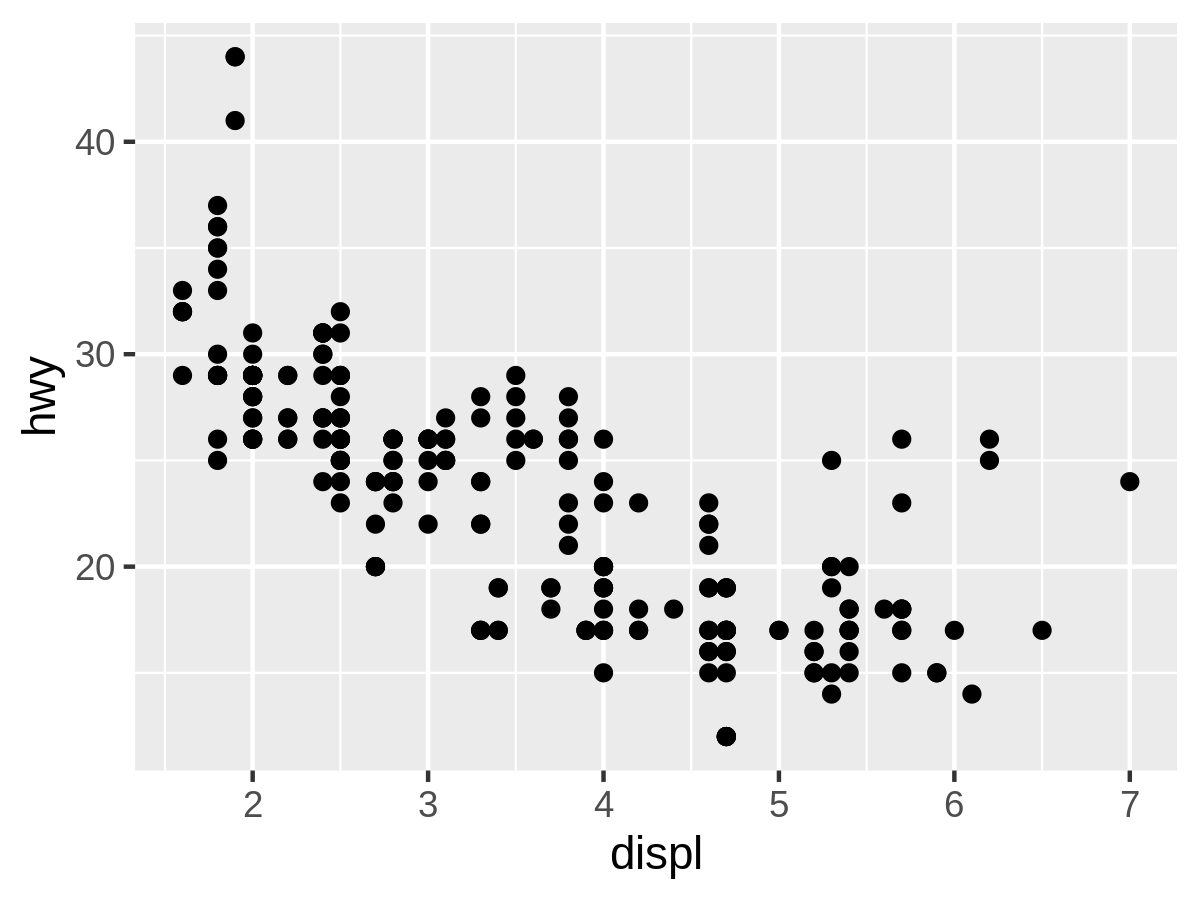

In [2]:
options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(mpg, aes(x = displ, y = hwy))

p = p + geom_point()

p

In [3]:
# ?geom_text

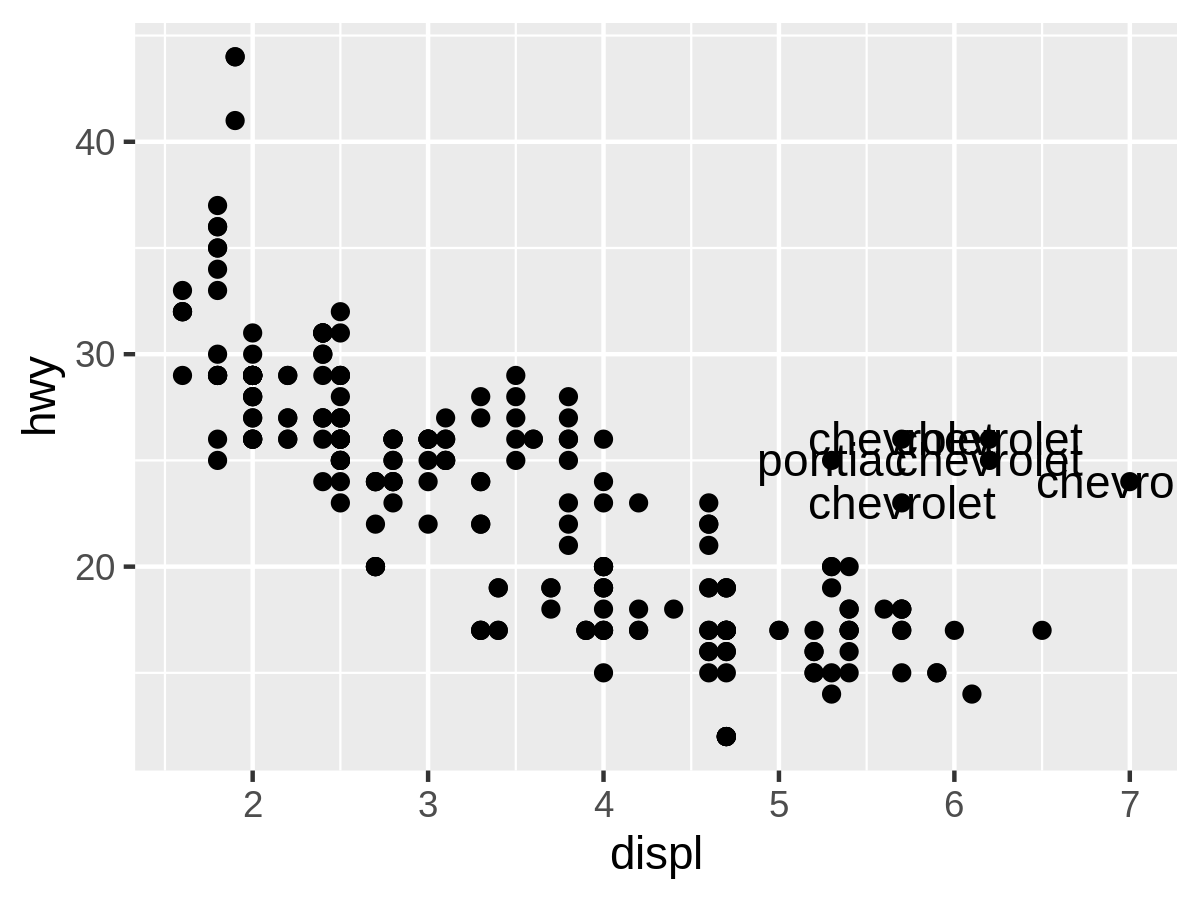

In [4]:
p + geom_text(data = mpg %>% filter(displ > 5, hwy > 21), 
              aes(label = manufacturer))

In [5]:
library('ggrepel')

[GGRepel](https://github.com/slowkow/ggrepel)

In [6]:
filtered.data = mpg %>% filter(displ > 5, hwy > 21)

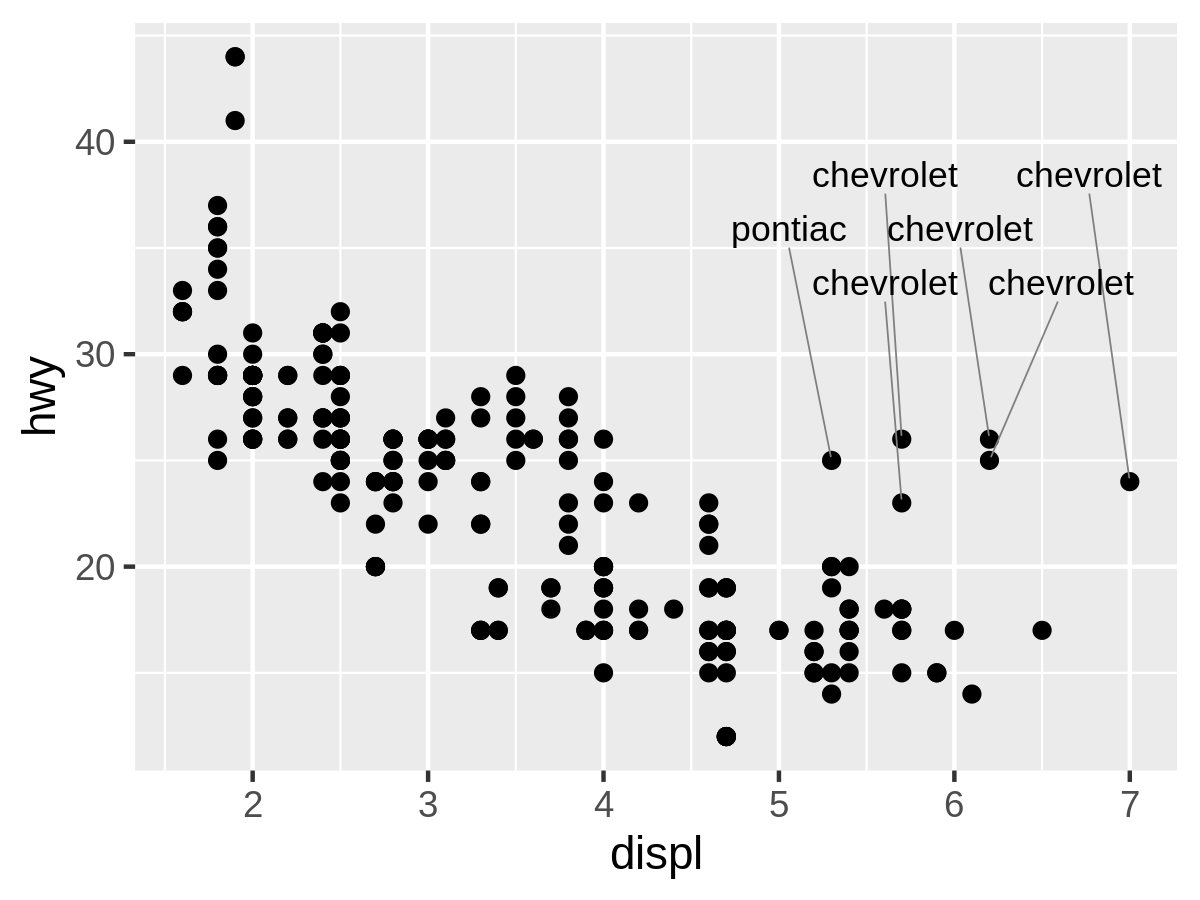

In [7]:
p + geom_text_repel(
        data = filtered.data,
        nudge_y = 36 - filtered.data$hwy,
        segment.size = 0.2,
        size = 3,
        segment.color = "grey50",
        aes(label = manufacturer)
    )

## Legends, axes, titles, themes

In [ ]:
theme_

In [ ]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)

p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_text_repel(
            data = filtered.data,
            nudge_y = 36 - filtered.data$hwy,
            segment.size = 0.2,
            size = 3,
            segment.color = "grey50",
            aes(label = manufacturer),
        )

# Theme
# Legend posiition
# Legend title
# Chart title
# Chart axis labels
# Chart axis text

p

[![](https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png?w=600)](https://fivethirtyeight.com/features/this-was-the-slowest-boston-marathon-since-the-1970s/)